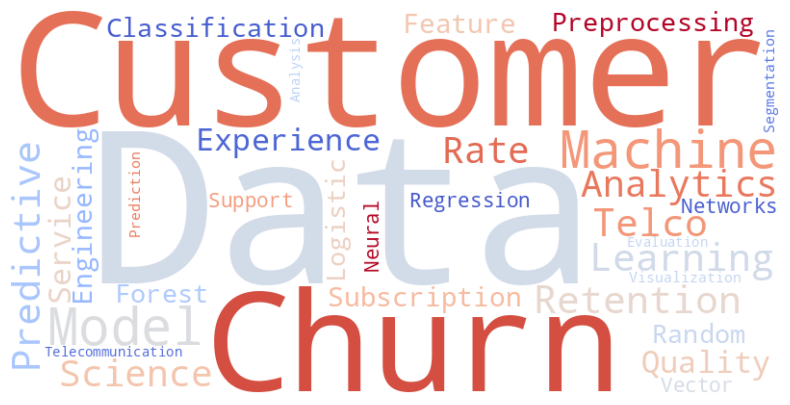

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text for the word cloud related to Telco Churn Prediction
text = """
Telco Churn
Machine Learning
Customer Retention
Predictive Analytics
Data Science
Churn Rate
Customer Experience
Service Quality
Subscription Model
Feature Engineering
Data Preprocessing
Classification
Random Forest
Logistic Regression
Support Vector Machine
Neural Networks
Customer Data
Data Visualization
Customer Segmentation
Churn Prediction
Telecommunication
Data Analysis
Model Evaluation
"""

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm', collocations=False).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Telco Churn Prediction

## 1. Business Problem

A machine learning model has been developed to predict customers who will leave the company.

## 2. About Dataset

Telco customer churn data contains information about a fictitious telecommunications company that provided home phone and Internet services to 7043 customers in California during the third quarter. It shows which customers have churned, stayed, or signed up for the service.

* **CustomerId:** Customer ID
* **Gender:** Gender
* **SeniorCitizen:** Whether the customer is a senior citizen (1, 0)
* **Partner:** Whether the customer has a partner (Yes, No)
* **Dependents:** Whether the customer has dependents (Yes, No)
* **tenure:** Number of months the customer has stayed with the company
* **PhoneService:** Whether the customer has phone service (Yes, No)
* **MultipleLines:** Whether the customer has multiple lines (Yes, No, No phone service)
* **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity:** Whether the customer has online security (Yes, No, No internet service)
* **OnlineBackup:** Whether the customer has online backup (Yes, No, No internet service)
* **DeviceProtection:** Whether the customer has device protection (Yes, No, No internet service)
* **TechSupport:** Whether the customer has tech support (Yes, No, No internet service)
* **StreamingTV:** Whether the customer has streaming TV (Yes, No, No internet service)
* **StreamingMovies:** Whether the customer has streaming movies (Yes, No, No internet service)
* **Contract:** Customer’s contract term (Month-to-month, One year, Two years)
* **PaperlessBilling:** Whether the customer has paperless billing (Yes, No)
* **PaymentMethod:** Customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges:** The amount charged to the customer monthly
* **TotalCharges:** The total amount charged to the customer
* **Churn:** Whether the customer has churned (Yes or No)

## 3. Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno as msno
import numpy as np
from datetime import date
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,RobustScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action="ignore")
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.width", 500)

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [3]:
#upload the dataset:

df_ = pd.read_csv("/kaggle/input/telcods/Telco-Customer-Churn.csv") 

In [4]:
# defining a function to upload the dataset

def load(dataframe): 
    df = dataframe.copy()
    return df

In [5]:
df = load(df_) # copy of the dataset
df.head() # #display first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [6]:
df.shape #display the shape of the dataset

(7043, 21)

In [7]:
df["customerID"].nunique()

7043

In [8]:
df.info() #info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe().T #descriptive statistics

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750


In [10]:
df.columns # display the names of columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [11]:
df.isnull().sum() # null count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.isnull().values.any() # checking the null values in the dataset 

False

In [13]:
# defining function to check all: 

def check_df(dataframe,head = 5):
    print("##################### SHAPE ####################")
    print(dataframe.shape)
    print("#################### COLUMNS ###################")
    print(dataframe.columns)
    print("#################### INDEX ###################")
    print(dataframe.index)
    print("#################### TYPES ##################")
    print(dataframe.dtypes)
    print("#################### NA ANY ###################")
    print(dataframe.isnull().values.any())
    print(f"#################### NA SUM - RATIO ####################")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(),
                        "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))
    print("#################### QUANTILES ###############")
    print(dataframe.describe([0,0.01,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99,1]).T)

check_df(df)

##################### SHAPE ####################
(7043, 21)
#################### COLUMNS ###################
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')
#################### INDEX ###################
RangeIndex(start=0, stop=7043, step=1)
#################### TYPES ##################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies     

In [14]:
# Capturing numeric and categorical variables:

def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    # cat_cols, cat_but_car:
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols , cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [15]:
cat_cols # categorical columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [16]:
num_cols # numeric columns

['tenure', 'MonthlyCharges']

In [17]:
cat_but_car # categorical type but cardinal columns

['customerID', 'TotalCharges']

> **Editing column types which we need:**

In [18]:
# defining a function to update cat_cols & num_cols by cat_but_car:

def col_types_updating_with_id_columns(dataframe,id_cols,car_but_cat_cols = []):
    # updating num_cols,cat_cols:
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    for col in cat_but_car:    
        if len(cat_but_car) > 0:
            num_cols.append(col)
            cat_cols.append(col)
            num_cols = [n_col for n_col in num_cols if (n_col not in id_cols) & (n_col not in car_but_cat_cols)]
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols) & (c_col not in num_cols)]
        else:continue
    return num_cols,cat_cols

In [19]:
num_cols,cat_cols = col_types_updating_with_id_columns(df,["customerID"])

In [20]:
cat_but_car

['customerID', 'TotalCharges']

In [21]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [22]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [23]:
# replacing " " to nan:

df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

In [24]:
df["TotalCharges"].isnull().sum()

11

In [25]:
#defining a function to change dtypes:

def update_not_correct_dtype(dataframe,num_cols,cat_cols):
    not_correct_dtype_n = [col for col in num_cols if dataframe[col].dtypes not in ["float64","int64","datetime64[ns]"]]
    not_correct_dtype_c = [col for col in cat_cols if dataframe[col].dtypes not in ["O","category","datetime64[ns]"]]
    if len(not_correct_dtype_n) > 0:
        for col in not_correct_dtype_n:
            dataframe[col] = dataframe[col].astype("float64")
    if len(not_correct_dtype_c) > 0:
        for col in not_correct_dtype_c:
            dataframe[col] = dataframe[col].astype("category")
    return not_correct_dtype_n,not_correct_dtype_c

In [26]:
not_correct_dtype_n,not_correct_dtype_c = update_not_correct_dtype(df,num_cols,cat_cols)

In [27]:
not_correct_dtype_n

['TotalCharges']

In [28]:
not_correct_dtype_c

['SeniorCitizen']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

### 3.1 Analysis of Categorical Variables

In [30]:
# defining a function to check summary of the categorical variables:

def cat_summary(dataframe,col_name,plot = False):
    print(f"#################### {col} Counts - Ratio ####################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print(f"#################### {col} Unique Variable Counts ####################")
    print(f"{col} : {dataframe[col_name].nunique()}")
    print(f"#################### {col} Counts - Ratio Visualizing ####################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

#################### gender Counts - Ratio ####################
        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
#################### gender Unique Variable Counts ####################
gender : 2
#################### gender Counts - Ratio Visualizing ####################


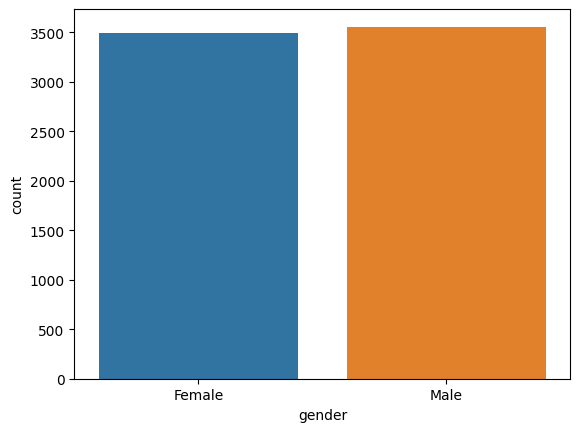

#################### Partner Counts - Ratio ####################
         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
#################### Partner Unique Variable Counts ####################
Partner : 2
#################### Partner Counts - Ratio Visualizing ####################


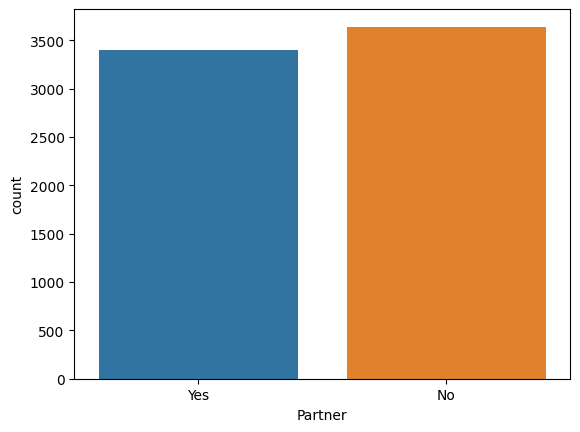

#################### Dependents Counts - Ratio ####################
            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
#################### Dependents Unique Variable Counts ####################
Dependents : 2
#################### Dependents Counts - Ratio Visualizing ####################


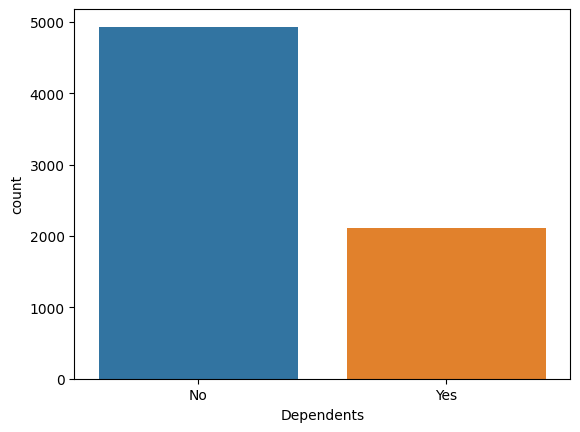

#################### PhoneService Counts - Ratio ####################
              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
#################### PhoneService Unique Variable Counts ####################
PhoneService : 2
#################### PhoneService Counts - Ratio Visualizing ####################


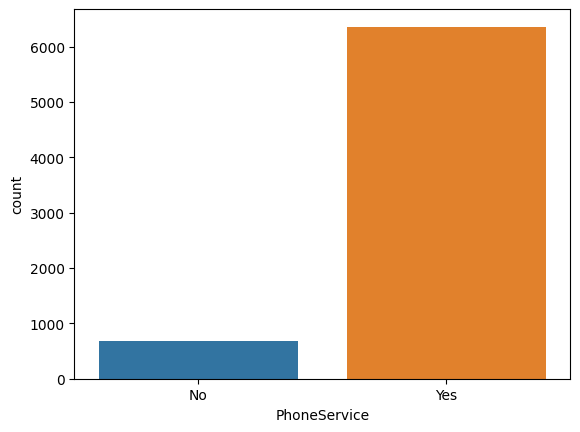

#################### MultipleLines Counts - Ratio ####################
                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
#################### MultipleLines Unique Variable Counts ####################
MultipleLines : 3
#################### MultipleLines Counts - Ratio Visualizing ####################


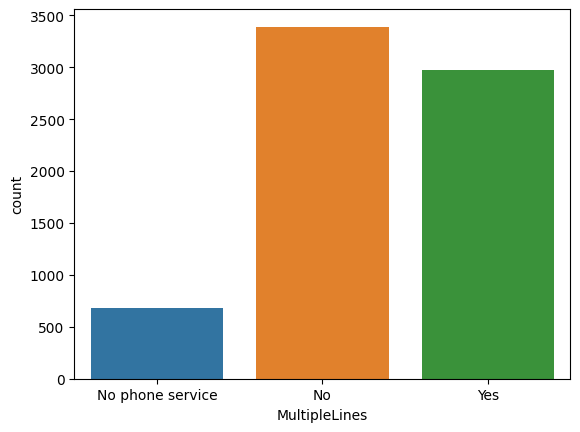

#################### InternetService Counts - Ratio ####################
                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
#################### InternetService Unique Variable Counts ####################
InternetService : 3
#################### InternetService Counts - Ratio Visualizing ####################


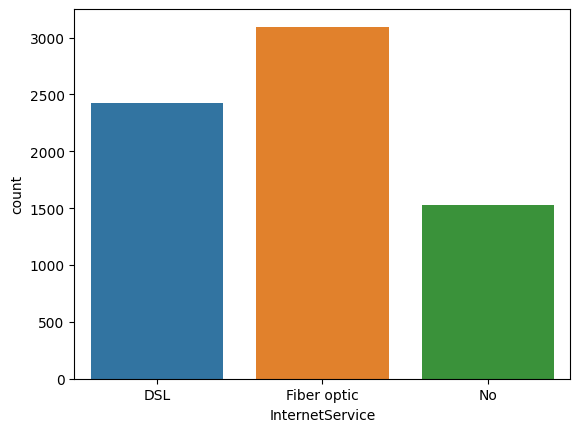

#################### OnlineSecurity Counts - Ratio ####################
                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
#################### OnlineSecurity Unique Variable Counts ####################
OnlineSecurity : 3
#################### OnlineSecurity Counts - Ratio Visualizing ####################


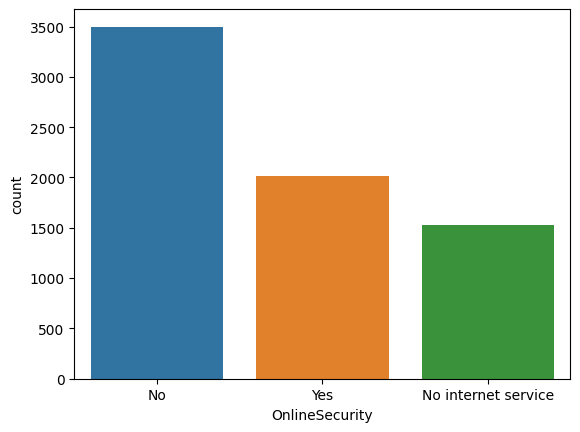

#################### OnlineBackup Counts - Ratio ####################
                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
#################### OnlineBackup Unique Variable Counts ####################
OnlineBackup : 3
#################### OnlineBackup Counts - Ratio Visualizing ####################


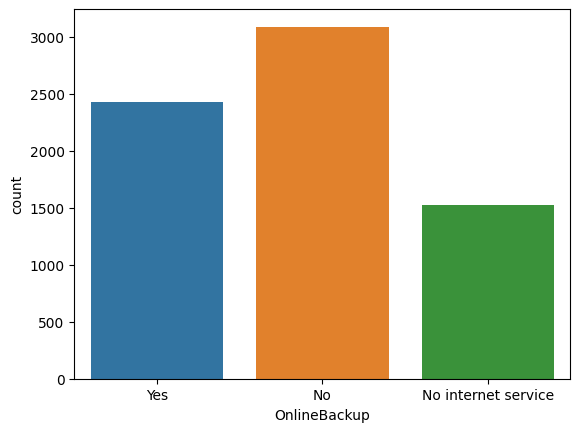

#################### DeviceProtection Counts - Ratio ####################
                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
#################### DeviceProtection Unique Variable Counts ####################
DeviceProtection : 3
#################### DeviceProtection Counts - Ratio Visualizing ####################


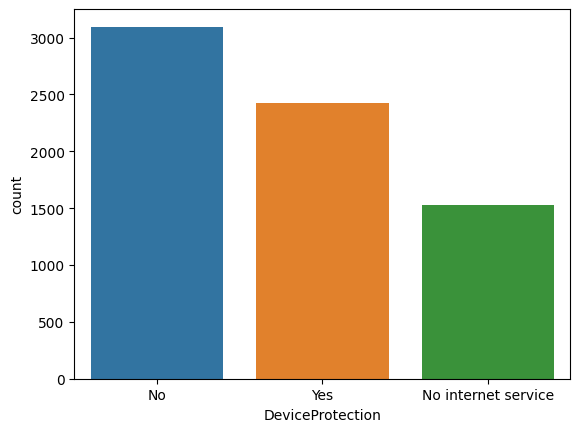

#################### TechSupport Counts - Ratio ####################
                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
#################### TechSupport Unique Variable Counts ####################
TechSupport : 3
#################### TechSupport Counts - Ratio Visualizing ####################


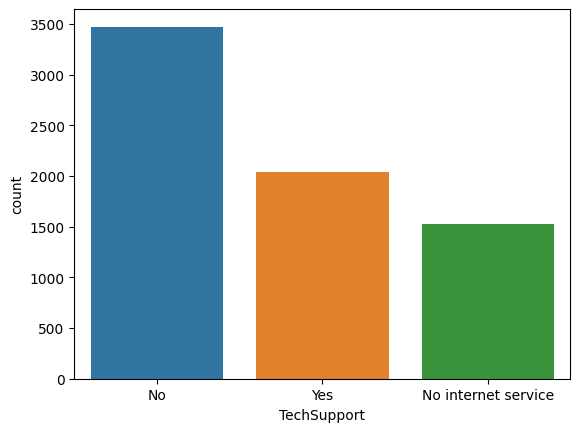

#################### StreamingTV Counts - Ratio ####################
                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
#################### StreamingTV Unique Variable Counts ####################
StreamingTV : 3
#################### StreamingTV Counts - Ratio Visualizing ####################


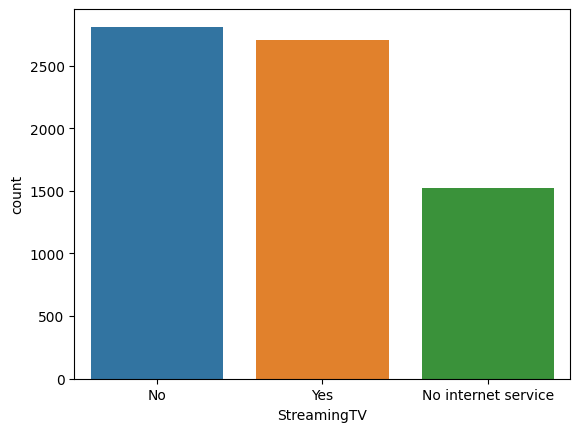

#################### StreamingMovies Counts - Ratio ####################
                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
#################### StreamingMovies Unique Variable Counts ####################
StreamingMovies : 3
#################### StreamingMovies Counts - Ratio Visualizing ####################


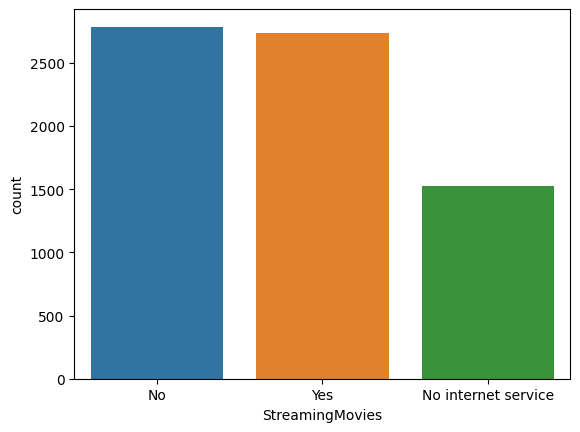

#################### Contract Counts - Ratio ####################
                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
#################### Contract Unique Variable Counts ####################
Contract : 3
#################### Contract Counts - Ratio Visualizing ####################


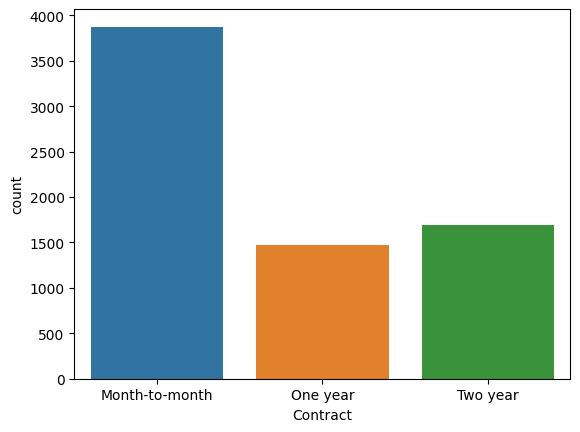

#################### PaperlessBilling Counts - Ratio ####################
                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
#################### PaperlessBilling Unique Variable Counts ####################
PaperlessBilling : 2
#################### PaperlessBilling Counts - Ratio Visualizing ####################


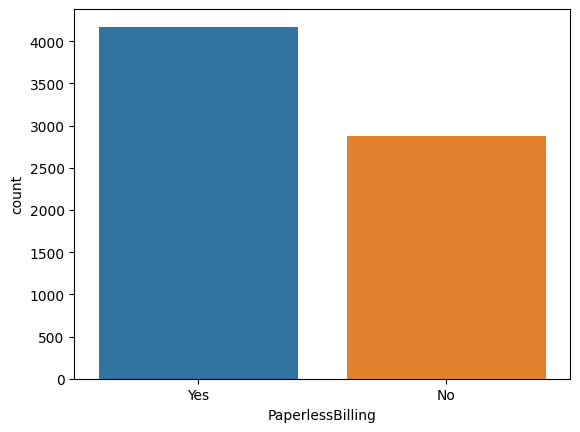

#################### PaymentMethod Counts - Ratio ####################
                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
#################### PaymentMethod Unique Variable Counts ####################
PaymentMethod : 4
#################### PaymentMethod Counts - Ratio Visualizing ####################


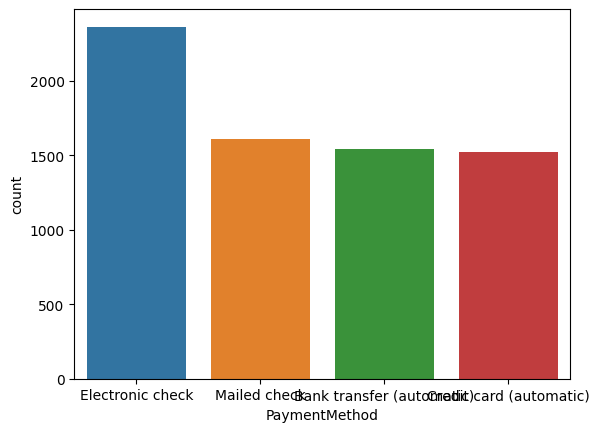

#################### Churn Counts - Ratio ####################
       Churn  Ratio
Churn              
No      5174 73.463
Yes     1869 26.537
#################### Churn Unique Variable Counts ####################
Churn : 2
#################### Churn Counts - Ratio Visualizing ####################


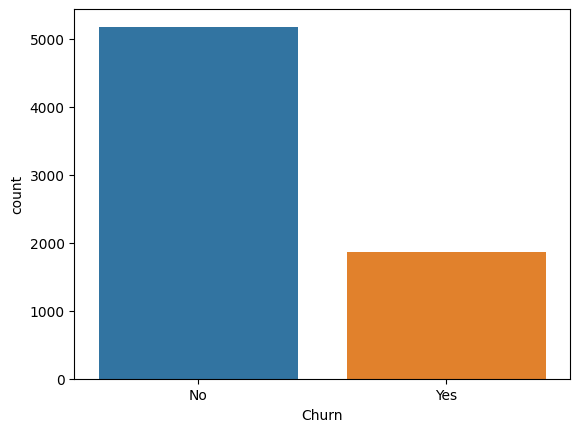

#################### SeniorCitizen Counts - Ratio ####################
               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
#################### SeniorCitizen Unique Variable Counts ####################
SeniorCitizen : 2
#################### SeniorCitizen Counts - Ratio Visualizing ####################


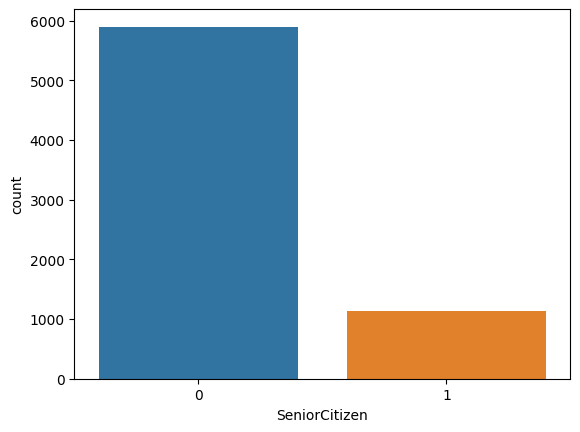

In [31]:
# applying the function:

for col in cat_cols:
    cat_summary(df, col, plot = True)
    

### 3.2 Analysis of Numerical Variables

In [32]:
# defining a function to check summary of the numerical variables:

def num_summary(dataframe,col_name,plot = False, quantiles = [0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block = True)
    print("#################### QUANTILES ###############")
    print(dataframe[col_name].describe(quantiles).T, end= "\n\n")

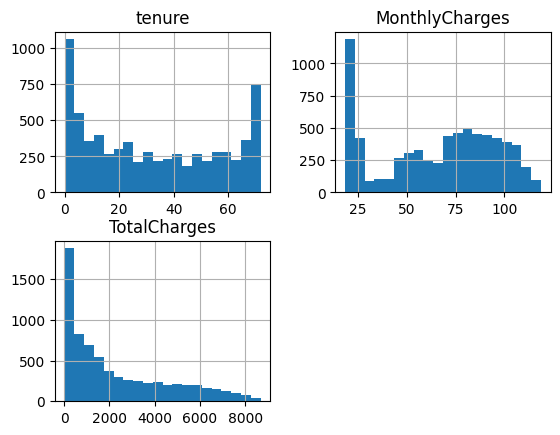

#################### QUANTILES ###############
                  count     mean      std    min     5%    10%     20%      50%      60%      80%      90%      95%      99%      max
tenure         7043.000   32.371   24.559  0.000  1.000  2.000   6.000   29.000   40.000   60.000   69.000   72.000   72.000   72.000
MonthlyCharges 7043.000   64.762   30.090 18.250 19.650 20.050  25.050   70.350   79.100   94.250  102.600  107.400  114.729  118.750
TotalCharges   7032.000 2283.300 2266.771 18.800 49.605 84.600 267.070 1397.475 2048.950 4475.410 5976.640 6923.590 8039.883 8684.800



In [33]:
# applying the function:

num_summary(df, num_cols, plot = True)

### 3.3 Target Variable Analysis

In [34]:
# Target - Categorical Variables

In [35]:
# defining a function to check summary of the target and categorical variables:

def target_summary_with_cat(dataframe,target,categorical_col):
    for col in categorical_col:
        print(f"################ Target Mean by {col} #################", end ="\n\n")
        print(pd.DataFrame({f"{target}_Mean": dataframe.groupby(col)[target].mean()}), end = "\n\n\n")

In [36]:
# label encoding to target value:

le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

In [37]:
# checking:

df[["Churn"]].head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [38]:
df["Churn"].dtypes

dtype('int64')

In [39]:
# applying the function:

target_summary_with_cat(df, "Churn", cat_cols)


################ Target Mean by gender #################

        Churn_Mean
gender            
Female       0.269
Male         0.262


################ Target Mean by Partner #################

         Churn_Mean
Partner            
No            0.330
Yes           0.197


################ Target Mean by Dependents #################

            Churn_Mean
Dependents            
No               0.313
Yes              0.155


################ Target Mean by PhoneService #################

              Churn_Mean
PhoneService            
No                 0.249
Yes                0.267


################ Target Mean by MultipleLines #################

                  Churn_Mean
MultipleLines               
No                     0.250
No phone service       0.249
Yes                    0.286


################ Target Mean by InternetService #################

                 Churn_Mean
InternetService            
DSL                   0.190
Fiber optic           0.419
No        

In [40]:
# Target - Numerical Variables

In [41]:
# defining a function to check summary of the target and numerical variables:

def target_summary_with_num(dataframe,target,numerical_col,plot=False):
    if plot:
        print(f"########### {target} Info - {numerical_col} Visualization ###########")
        sns.pairplot(data=dataframe, vars=numerical_col, hue=target, height=5)
        plt.show()
    for col in numerical_col:
        print(f"##################### {col} Describe ####################################")
        print(pd.DataFrame({col: dataframe[col].describe().T}), end = "\n\n\n")
        print(f"####################### {target} - {col} Mean #################################")
        print(dataframe.groupby(target).agg({col:"mean"}), end = "\n\n\n")

########### Churn Info - ['tenure', 'MonthlyCharges', 'TotalCharges'] Visualization ###########


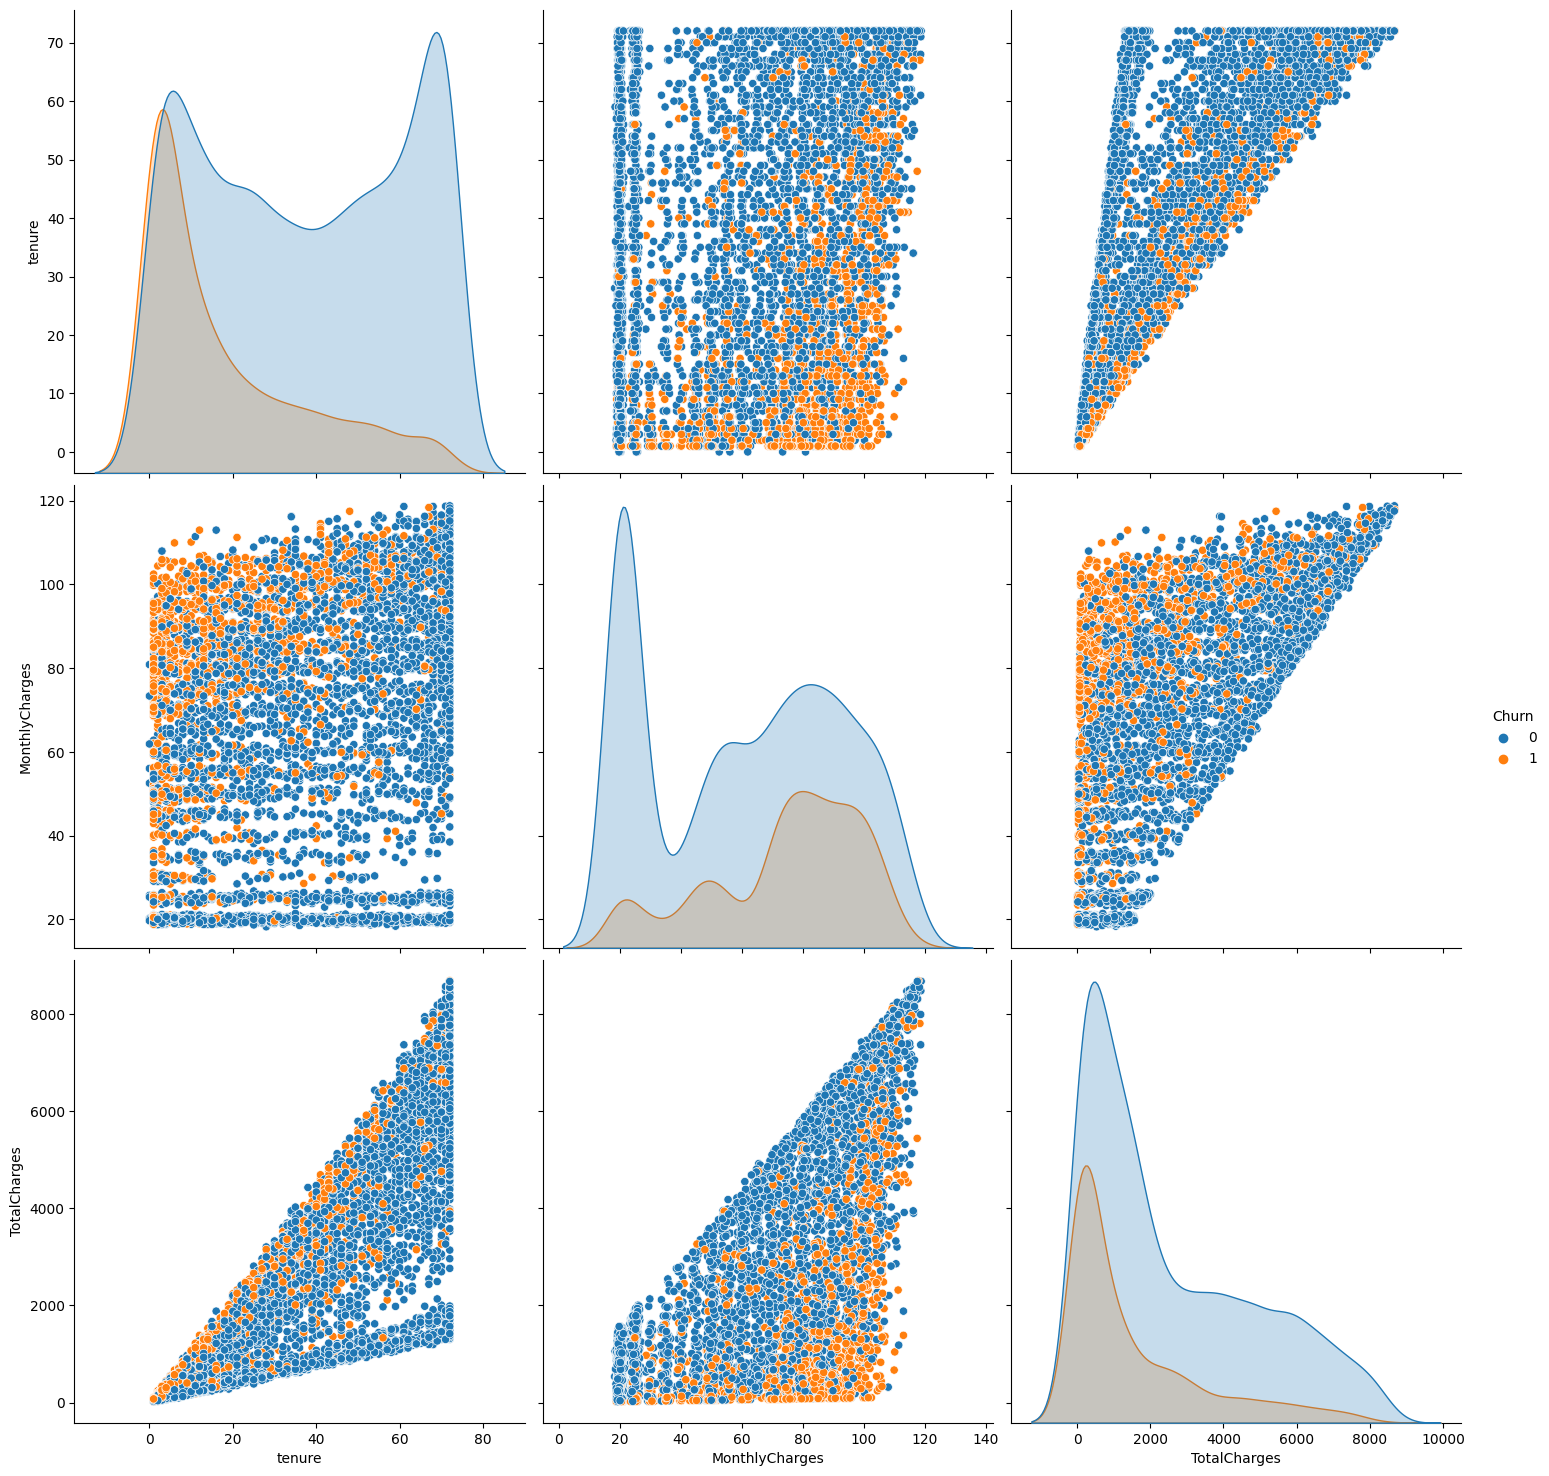

##################### tenure Describe ####################################
        tenure
count 7043.000
mean    32.371
std     24.559
min      0.000
25%      9.000
50%     29.000
75%     55.000
max     72.000


####################### Churn - tenure Mean #################################
       tenure
Churn        
0      37.570
1      17.979


##################### MonthlyCharges Describe ####################################
       MonthlyCharges
count        7043.000
mean           64.762
std            30.090
min            18.250
25%            35.500
50%            70.350
75%            89.850
max           118.750


####################### Churn - MonthlyCharges Mean #################################
       MonthlyCharges
Churn                
0              61.265
1              74.441


##################### TotalCharges Describe ####################################
       TotalCharges
count      7032.000
mean       2283.300
std        2266.771
min          18.800
25%         

In [42]:
# applying the function:

target_summary_with_num(df,"Churn",num_cols,plot=True)

### 3.4 Outlier Analysis

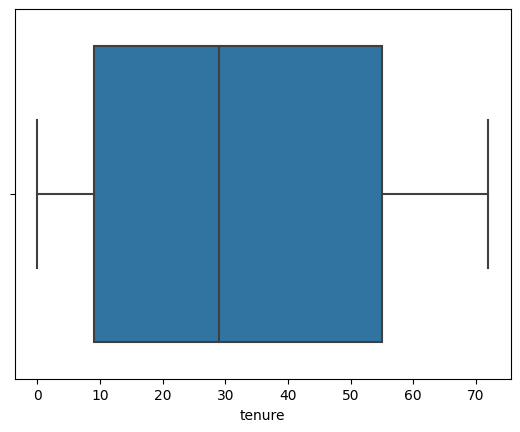

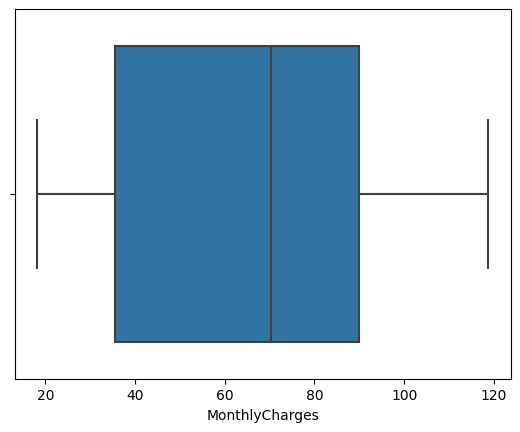

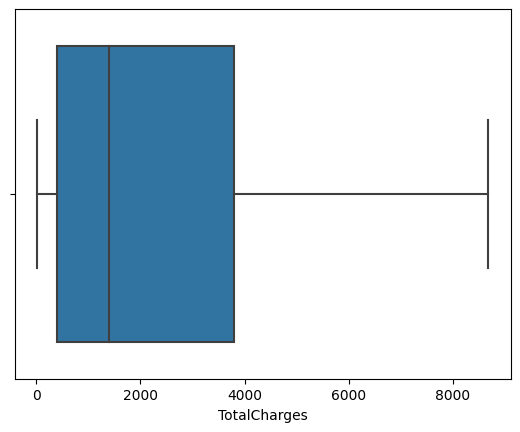

In [43]:
# outlier analysis using graphical techniques:

for col in num_cols:
    sns.boxplot(x= df[col])
    plt.show()
    

In [44]:
# calculating ouitlier thresholds:

def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    return low_limit, up_limit

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [46]:
# checking outlier in the dataframe:

def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low, up = outlier_thresholds(dataframe, col_name)
        return (dataframe[col_name] > up) | (dataframe[col_name] < low)
    else:
        return pd.Series(False, index=dataframe.index)

In [47]:
#checking results:
check_outlier(df, num_cols).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [48]:
#defining a function to check columns outliers:

def check_all_columns_outliers(dataframe,num_cols):
    results = {}
    for col in num_cols:
        results[col] = check_outlier(dataframe, col).any() if pd.api.types.is_numeric_dtype(dataframe[col]) else False
    return results

In [49]:
#checking results:

check_all_columns_outliers(df,num_cols)

{'tenure': False, 'MonthlyCharges': False, 'TotalCharges': False}

In [50]:
# listing columns based on outlier information:

def show_column_names_with_outliers_info(dataframe,col_list):
    print("################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################")
    for col in col_list:
        low, up = outlier_thresholds(dataframe,col)
        print(f"{col} : low: {low}, up: {up}",end ="\n")
    print(end="\n\n")
    no_outliers = []
    have_outliers = []
    for col,value in check_all_columns_outliers(dataframe,col_list).items():
        if value:
            have_outliers.append(col)
        else:
            no_outliers.append(col)
    print("################# Numeric Columns Have Outliers  #####################")
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")
    print("################# Numeric Columns Have NOT Outliers #####################")
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")
    return have_outliers,no_outliers


In [51]:
# applying the function:

have_outliers,no_outliers = show_column_names_with_outliers_info(df,num_cols)

################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################
tenure : low: -105.5, up: 178.5
MonthlyCharges : low: -111.975, up: 239.025
TotalCharges : low: -10261.3725, up: 17234.567499999997


################# Numeric Columns Have Outliers  #####################
[]
count_columns: 0

################# Numeric Columns Have NOT Outliers #####################
['tenure', 'MonthlyCharges', 'TotalCharges']
count_columns: 3



### 3.5 Correlation Analysis

In [52]:
# calculating correlation :

corr = df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


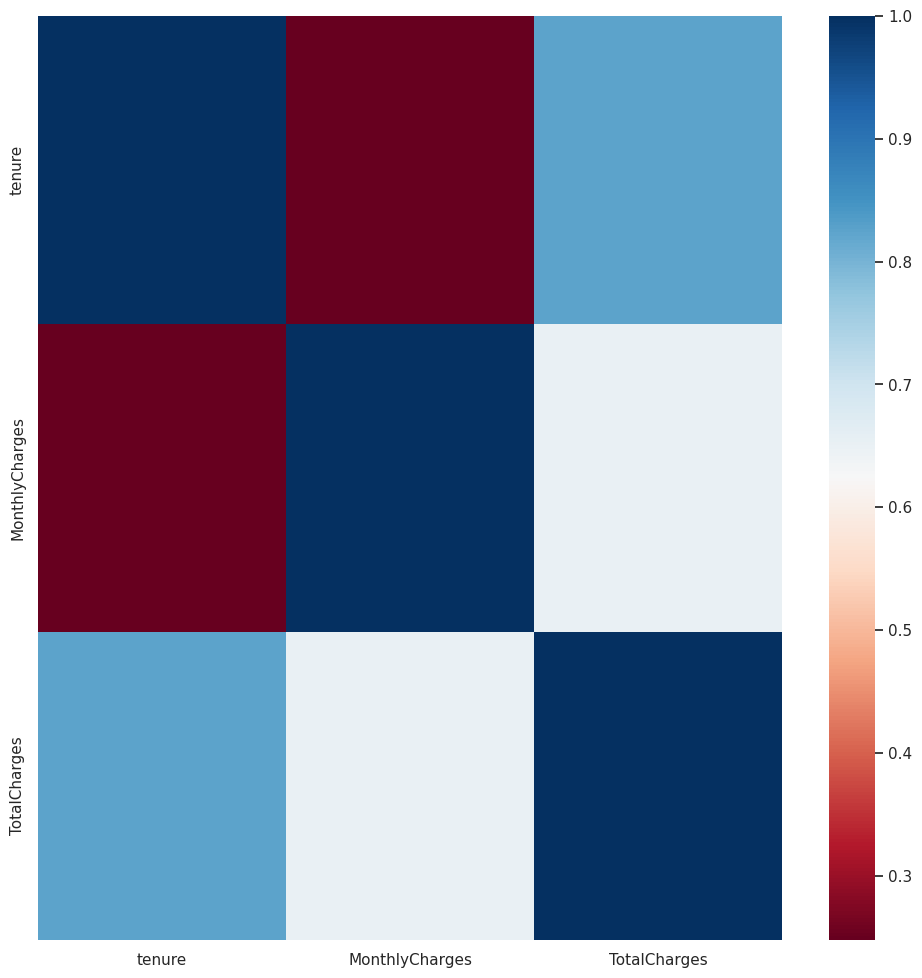

In [53]:
# correlation graph:

sns.set(rc = {"figure.figsize":(12,12)})
sns.heatmap(corr,cmap = "RdBu")
plt.show()

In [54]:
# high correlation columns 
# list of items to be dropped:

def high_correlated_cols(dataframe,plot= False, corr_th = 0.90):
    import numpy as np
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc = {"figure.figsize":(15,15)})
        sns.heatmap(corr_matrix,cmap = "RdBu")
        plt.show()
    return drop_list

In [55]:
# applying the function:

high_correlated_cols(df[num_cols],plot=False)

[]

## 4. Feature Engineering

### 4.1 Missing Values 

In [56]:
df["TotalCharges"].isnull().sum()

11

In [57]:
# fill the null values:

for col in ["TotalCharges"]:
    df[col].fillna(df[col].median(), inplace = True)

In [58]:
df[col].isnull().sum()

0

### 4.2 Outlier Suppression

In [59]:
# outlier suppression:

def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low),variable] = low
    dataframe.loc[(dataframe[variable] > up),variable] = up

In [60]:
#applying the function:

for col in have_outliers:
    replace_with_thresholds(df,col)

In [61]:
df.describe().T # descriptive statistics again

,count,mean,std,min,25%,50%,75%,max
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
TotalCharges,7043.000,2281.917,2265.270,18.800,402.225,1397.475,3786.600,8684.800
Churn,7043.000,0.265,0.442,0.000,0.000,0.000,1.000,1.000


### 4.3 Feature Extraction

In [62]:
# Tenure & TotalCharges

# Tenure & Pregnancies quantiles:
tenure_q25 = df["tenure"].quantile(0.25)
tenure_q75 = df["tenure"].quantile(0.75)
totalcharges_q25 = df["TotalCharges"].quantile(0.25)
totalcharges_q75 = df["TotalCharges"].quantile(0.75)

# new_customers:
df.loc[(df["tenure"] > tenure_q75) & (df["TotalCharges"] > totalcharges_q75), "New_Tenure_TotalCharges"] = "long-term customers and high TotalCharges"
df.loc[(df["tenure"] > tenure_q75) & (df["TotalCharges"] > totalcharges_q25) & (df["TotalCharges"] <= totalcharges_q75), "New_Tenure_TotalCharges"] = "long-term customers and mid TotalCharges"
df.loc[(df["tenure"] > tenure_q75) & (df["TotalCharges"] <= totalcharges_q25) & (df["TotalCharges"] > 0), "New_Tenure_TotalCharges"] = "long-term customers and low TotalCharges"
df.loc[(df["tenure"] > tenure_q75) & (df["TotalCharges"] == 0), "New_Tenure_TotalCharges"] = "long-term customers and no TotalCharges"
df.loc[(df["tenure"] > tenure_q75) & ((df["tenure"] < 0)|(df["TotalCharges"] < 0)), "New_Tenure_TotalCharges"] = "impossible"

# mid-term customers:
df.loc[(df["tenure"] > tenure_q25) & (df["tenure"] <= tenure_q75) & (df["TotalCharges"] > totalcharges_q75), "New_Tenure_TotalCharges"] = "mid-term customers and high TotalCharges"
df.loc[(df["tenure"] > tenure_q25) & (df["tenure"] <= tenure_q75) & (df["TotalCharges"] > totalcharges_q25) & (df["TotalCharges"] <= totalcharges_q75), "New_Tenure_TotalCharges"] = "mid-term customers and mid TotalCharges"
df.loc[(df["tenure"] > tenure_q25) & (df["tenure"] <= tenure_q75) & (df["TotalCharges"] <= totalcharges_q25) & (df["TotalCharges"] > 0), "New_Tenure_TotalCharges"] = "mid-term customers and low TotalCharges"
df.loc[(df["tenure"] > tenure_q25) & (df["tenure"] <= tenure_q75) & (df["TotalCharges"] == 0), "New_Tenure_TotalCharges"] = "mid-term customers and no TotalCharges"
df.loc[(df["tenure"] > tenure_q25) & (df["tenure"] <= tenure_q75) & ((df["tenure"] < 0)|(df["TotalCharges"] < 0)), "New_Tenure_TotalCharges"] = "impossible"

# long-term customers:
df.loc[(df["tenure"] <= tenure_q25) & (df["TotalCharges"] > totalcharges_q75), "New_Tenure_TotalCharges"] = "new customers and high TotalCharges"
df.loc[(df["tenure"] <= tenure_q25) & (df["TotalCharges"] > totalcharges_q25) & (df["TotalCharges"] <= totalcharges_q75), "New_Tenure_TotalCharges"] = "new customers and mid TotalCharges"
df.loc[(df["tenure"] <= tenure_q25) & (df["TotalCharges"] <= totalcharges_q25) & (df["TotalCharges"] > 0), "New_Tenure_TotalCharges"] = "new customers and low TotalCharges"
df.loc[(df["tenure"] <= tenure_q25) & (df["TotalCharges"] == 0), "New_Tenure_TotalCharges"] = "new customers and no TotalCharges"
df.loc[(df["tenure"] <= tenure_q25) & ((df["tenure"] < 0)|(df["TotalCharges"] < 0)), "New_Tenure_TotalCharges"] = "impossible"

In [63]:
df["New_Tenure_TotalCharges"].value_counts()

New_Tenure_TotalCharges
mid-term customers and mid TotalCharges      2686
new customers and low TotalCharges           1511
long-term customers and high TotalCharges    1263
mid-term customers and high TotalCharges      498
long-term customers and mid TotalCharges      492
new customers and mid TotalCharges            343
mid-term customers and low TotalCharges       250
Name: count, dtype: int64

In [64]:
# monthly & annually contract type:

df["New_Contract_type"] = df["Contract"].apply(lambda x: "annually" if x in ["One year","Two year"] else "monthly")

In [65]:
df["New_Contract_type"].value_counts()

New_Contract_type
monthly     3875
annually    3168
Name: count, dtype: int64

In [66]:
# PaperlessBilling & PaymentMethod:
    
df.loc[(df["PaperlessBilling"] == "Yes") & (df["PaymentMethod"] == "Electronic check"),"New_billing_payment"] = "paperlessbilling & electronic check"

In [67]:
df["New_billing_payment"] = df["New_billing_payment"].apply(lambda x: "paperlessbilling & electronic check" if x == "paperlessbilling & electronic check" else "no paperlessbilling & electronic check")

In [68]:
df["New_billing_payment"].value_counts()

New_billing_payment
no paperlessbilling & electronic check    5301
paperlessbilling & electronic check       1742
Name: count, dtype: int64

In [69]:
# OnlineSecurity & OnlineBackup & DeviceProtection:

df.loc[((df["OnlineSecurity"] == "No")) & ((df["OnlineBackup"] == "No")) & ((df["DeviceProtection"] == "No")),"New_no_security"] = "OnlineSecurity & OnlineBackup & DeviceProtection"

In [70]:
df["New_no_security"] = df["New_no_security"].apply(lambda x: "no_OnlineSecurity & OnlineBackup & DeviceProtection" if x in ["OnlineSecurity & OnlineBackup & DeviceProtection"] else "yes_OnlineSecurity & OnlineBackup & DeviceProtection")

In [71]:
df["New_no_security"].value_counts()

New_no_security
yes_OnlineSecurity & OnlineBackup & DeviceProtection    5534
no_OnlineSecurity & OnlineBackup & DeviceProtection     1509
Name: count, dtype: int64

In [72]:
# tenure*TotalCharges:

df["New_tenure*TotalCharges"] = df["tenure"] * df["TotalCharges"]

In [73]:
df["New_tenure*TotalCharges"].head()

0      29.850
1   64243.000
2     216.300
3   82833.750
4     303.300
Name: New_tenure*TotalCharges, dtype: float64

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Tenure_TotalCharges,New_Contract_type,New_billing_payment,New_no_security,New_tenure*TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,new customers and low TotalCharges,monthly,paperlessbilling & electronic check,yes_OnlineSecurity & OnlineBackup & DeviceProt...,29.850
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,mid-term customers and mid TotalCharges,annually,no paperlessbilling & electronic check,yes_OnlineSecurity & OnlineBackup & DeviceProt...,64243.000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,new customers and low TotalCharges,monthly,no paperlessbilling & electronic check,yes_OnlineSecurity & OnlineBackup & DeviceProt...,216.300
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,mid-term customers and mid TotalCharges,annually,no paperlessbilling & electronic check,yes_OnlineSecurity & OnlineBackup & DeviceProt...,82833.750
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,new customers and low TotalCharges,monthly,paperlessbilling & electronic check,no_OnlineSecurity & OnlineBackup & DeviceProte...,303.300


### 4.4 Encoding

In [75]:
# for categorical columns:

In [76]:
# defining a function for label encoding:

def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [77]:
# creating a list to label encoding:

# binary columns:

binary_cols = [col for col in df.columns if (df[col].dtypes not in ["float64","int64"]) & (df[col].nunique() == 2) & (col not in ["Churn"])]
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'New_Contract_type',
 'New_billing_payment',
 'New_no_security']

In [78]:
# applying the function:

for col in binary_cols:
    label_encoder(df,col)

In [79]:
# creating a list to apply label encoding:

# ordinal columns:

ordinal_cols = ["Contract","New_Contract_type"]

In [80]:
# applying the function:

for col in ordinal_cols:
    label_encoder(df,col)

In [81]:
# defining a function for one-hot encoding:

def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe,columns = cols, drop_first=drop_first)
    return dataframe

In [82]:
# creating a list to apply one-hot encoding:

# nominal columns:

ohe_cols = [col for col in df.columns if (df[col].dtype not in ["float64","int64"]) & (df[col].nunique() > 2) & (col not in ordinal_cols) & (col not in cat_but_car)]
ohe_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaymentMethod',
 'New_Tenure_TotalCharges']

In [83]:
# applying the function:

df = one_hot_encoder(df,ohe_cols)

In [84]:
#checking:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_Contract_type,New_billing_payment,New_no_security,New_tenure*TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,New_Tenure_TotalCharges_long-term customers and mid TotalCharges,New_Tenure_TotalCharges_mid-term customers and high TotalCharges,New_Tenure_TotalCharges_mid-term customers and low TotalCharges,New_Tenure_TotalCharges_mid-term customers and mid TotalCharges,New_Tenure_TotalCharges_new customers and low TotalCharges,New_Tenure_TotalCharges_new customers and mid TotalCharges
0,7590-VHVEG,0,0,1,0,1,0,0,1,29.850,29.850,0,1,1,1,29.850,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,1,0,56.950,1889.500,0,0,0,1,64243.000,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,0,1,53.850,108.150,1,1,0,1,216.300,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,7795-CFOCW,1,0,0,0,45,0,1,0,42.300,1840.750,0,0,0,1,82833.750,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,0,1,70.700,151.650,1,1,1,0,303.300,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


### 4.5 Scaling

In [85]:
# for numerical columns:

In [86]:
# standardization of numerical variables:

ss = StandardScaler()
ss_cols = [col for col in num_cols if col not in ["Churn"]]
df[ss_cols] = ss.fit_transform(df[ss_cols])

In [87]:
#checking:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_Contract_type,New_billing_payment,New_no_security,New_tenure*TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,New_Tenure_TotalCharges_long-term customers and mid TotalCharges,New_Tenure_TotalCharges_mid-term customers and high TotalCharges,New_Tenure_TotalCharges_mid-term customers and low TotalCharges,New_Tenure_TotalCharges_mid-term customers and mid TotalCharges,New_Tenure_TotalCharges_new customers and low TotalCharges,New_Tenure_TotalCharges_new customers and mid TotalCharges
0,7590-VHVEG,0,0,1,0,-1.277,0,0,1,-1.160,-0.994,0,1,1,1,29.850,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,0.066,1,1,0,-0.260,-0.173,0,0,0,1,64243.000,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,3668-QPYBK,1,0,0,0,-1.237,1,0,1,-0.363,-0.960,1,1,0,1,216.300,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,7795-CFOCW,1,0,0,0,0.514,0,1,0,-0.747,-0.195,0,0,0,1,82833.750,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,-1.237,1,0,1,0.197,-0.940,1,1,1,0,303.300,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


# 5. Model

## 5.1 Hold-out Method 

In [88]:
# split the model:

y = df["Churn"] # target
X = df.drop(["Churn","customerID"], axis=1) # train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24) # split the data

## 5.2 Modeling 

In [89]:
# creating a list with models and pipelines:
models = [('Logistic Regression', LogisticRegression()),('Random Forest', RandomForestClassifier()),
          ('Support Vector Machine', SVC()),('KNeighborsClassifier', KNeighborsClassifier())]

In [90]:
# fitting models:

for name, classifier in models:
    classifier.fit(X_train, y_train)

## 5.3. Model Performance Evaluation

In [91]:
# evaluating results:

for model_name, classifier in models:
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_pred,y_test)
    precision = precision_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1: {f1:.2f}",end="\n\n")

Logistic Regression:
Accuracy: 0.75
Recall: 0.000
Precision: 0.00
F1: 0.00

Random Forest:
Accuracy: 0.81
Recall: 0.642
Precision: 0.53
F1: 0.58

Support Vector Machine:
Accuracy: 0.75
Recall: 0.000
Precision: 0.00
F1: 0.00

KNeighborsClassifier:
Accuracy: 0.74
Recall: 0.462
Precision: 0.31
F1: 0.37



## 5.4. Cross Validation

In [92]:
# evaluating 5-fold cross validation results:

for model_name, classifier in models:
    scoring = {'accuracy': 'accuracy','recall': 'recall','precision': 'precision','f1': 'f1','roc_auc': 'roc_auc'}
    cv_results = cross_validate(classifier,X,y,cv=5,scoring=scoring)
    print(f"{model_name}:",end="\n")
    print("Accuracy: ", cv_results['test_accuracy'].mean())
    print("Recall: ", cv_results['test_recall'].mean())
    print("Precision: ", cv_results['test_precision'].mean())
    print("F1: ", cv_results['test_f1'].mean())
    print("Auc: ", cv_results['test_roc_auc'].mean(),end="\n\n")

Logistic Regression:
Accuracy:  0.7377529397057876
Recall:  0.019786096256684493
Precision:  0.2845238095238095
F1:  0.036985924648116196
Auc:  0.749650536201543

Random Forest:
Accuracy:  0.7897213126653333
Recall:  0.4954509612765408
Precision:  0.6342986102686878
F1:  0.5558481767432288
Auc:  0.8257289111671365

Support Vector Machine:
Accuracy:  0.7346301575908123
Recall:  0.0
Precision:  0.0
F1:  0.0
Auc:  0.43797308606920426

KNeighborsClassifier:
Accuracy:  0.7282422454674495
Recall:  0.2894496136256111
Precision:  0.48107444955574996
F1:  0.36085982513340503
Auc:  0.6258515172871318



# 6. Hyperparameter Tuning

## 6.1 Determining Parameters

In [93]:
# default parameters of the models:

for model_name, classifier in models:
    print(f"####################### {model_name} #######################")
    print(f"parameters: {classifier.get_params()}",end="\n\n")

####################### Logistic Regression #######################
parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

####################### Random Forest #######################
parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

####################### Support Vector Machine #######################
parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'dec

In [94]:
# determined parameters of the models for hiperparameter tuning:

model_params = [
    ('Logistic Regression', LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10],
        'solver': [ 'lbfgs', 'liblinear'],  
        'max_iter': [500, 1000, 1500],  
        'tol': [1e-4, 1e-3, 1e-2]  
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),    
    ('Support Vector Machine', SVC(), {
        'C': [0.1, 1, 5],
        'degree': [2, 3, 4],
        'gamma': ['scale']
    }),
    ('KNeighborsClassifier', KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]})
]

## 6.2 Best Parameters & Best Scores

In [95]:
# hiperparameter tuning:
# best parameters and best scores on the models:

best_model_name = None
best_model = None
best_score = float('-inf')
best_params = None

for model_name, classifier, params in model_params:
    classifier_grid = GridSearchCV(classifier, params, cv=5, n_jobs = -1, verbose = True).fit(X, y)
    
    print(f"Model: {model_name}")
    print("Best Parameters:", classifier_grid.best_params_)
    print("Best Score:", classifier_grid.best_score_,end="\n\n")
    print("######################",end="\n\n")
    
    if  classifier_grid.best_score_ > best_score:
        best_model_name = model_name
        best_model = classifier
        best_score = classifier_grid.best_score_
        best_params = classifier_grid.best_params_
        
      
print("######################### Best Model & Hyperparameters #########################")
print(f"Model: {best_model_name}")
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Model: Logistic Regression
Best Parameters: {'C': 0.01, 'max_iter': 500, 'solver': 'lbfgs', 'tol': 0.0001}
Best Score: 0.7377529397057876

######################

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Model: Random Forest
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8060494830311633

######################

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: Support Vector Machine
Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale'}
Best Score: 0.7346301575908123

######################

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Model: KNeighborsClassifier
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Score: 0.7526628734111878

######################

######################### Best Model & Hyperparameters ####################

In [96]:
best_model

RandomForestClassifier()

In [97]:
# defining a function to find parameters for the best model:

def find_best_model_params(model_params,best_model):
    for model_name, classifier, params in model_params:
        if best_model == classifier:
            best_model_params = params
    return best_model_params

In [98]:
#appyling the function:

best_model_params = find_best_model_params(model_params,best_model)

In [99]:
best_model_params

{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [100]:
classifier_best_grid = GridSearchCV(best_model, best_model_params, cv=5, n_jobs = -1, verbose = True).fit(X, y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


# 7. Final Model

## 7.1 Modeling

In [101]:
# fitting final model to use best parameters:

model_final = RandomForestClassifier(**classifier_best_grid.best_params_).fit(X, y)

## 7.2 Cross Validation

In [102]:
# evaluating 5-fold cross validation results:

scoring = {'accuracy': 'accuracy','recall': 'recall','precision': 'precision','f1': 'f1','roc_auc': 'roc_auc'}
cv_results = cross_validate(model_final,X,y,cv=5,scoring=scoring)
print(f"Best Model: {best_model_name} ",end="\n")
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("F1: ", cv_results['test_f1'].mean())
print("Auc: ", cv_results['test_roc_auc'].mean(),end="\n\n")

Best Model: Random Forest 
Accuracy:  0.8033523332150461
Recall:  0.5184714197645912
Precision:  0.6667109306788763
F1:  0.5832716035477684
Auc:  0.8443060469008156



## 7.3 Feature Importance

In [103]:
# creating function to visualize:

def plot_importance(model, features, start = 0 ,num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False)[start:num])
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[start:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

    Value                                            Feature
4   0.110                                             tenure
13  0.107                            New_tenure*TotalCharges
8   0.101                                     MonthlyCharges
9   0.096                                       TotalCharges
10  0.093                                  New_Contract_type
6   0.080                                           Contract
16  0.056                        InternetService_Fiber optic
11  0.042                                New_billing_payment
31  0.038                     PaymentMethod_Electronic check
12  0.026                                    New_no_security
37  0.022  New_Tenure_TotalCharges_new customers and low ...
25  0.018                                    TechSupport_Yes
19  0.016                                 OnlineSecurity_Yes
7   0.013                                   PaperlessBilling
15  0.012                                  MultipleLines_Yes
1   0.012               

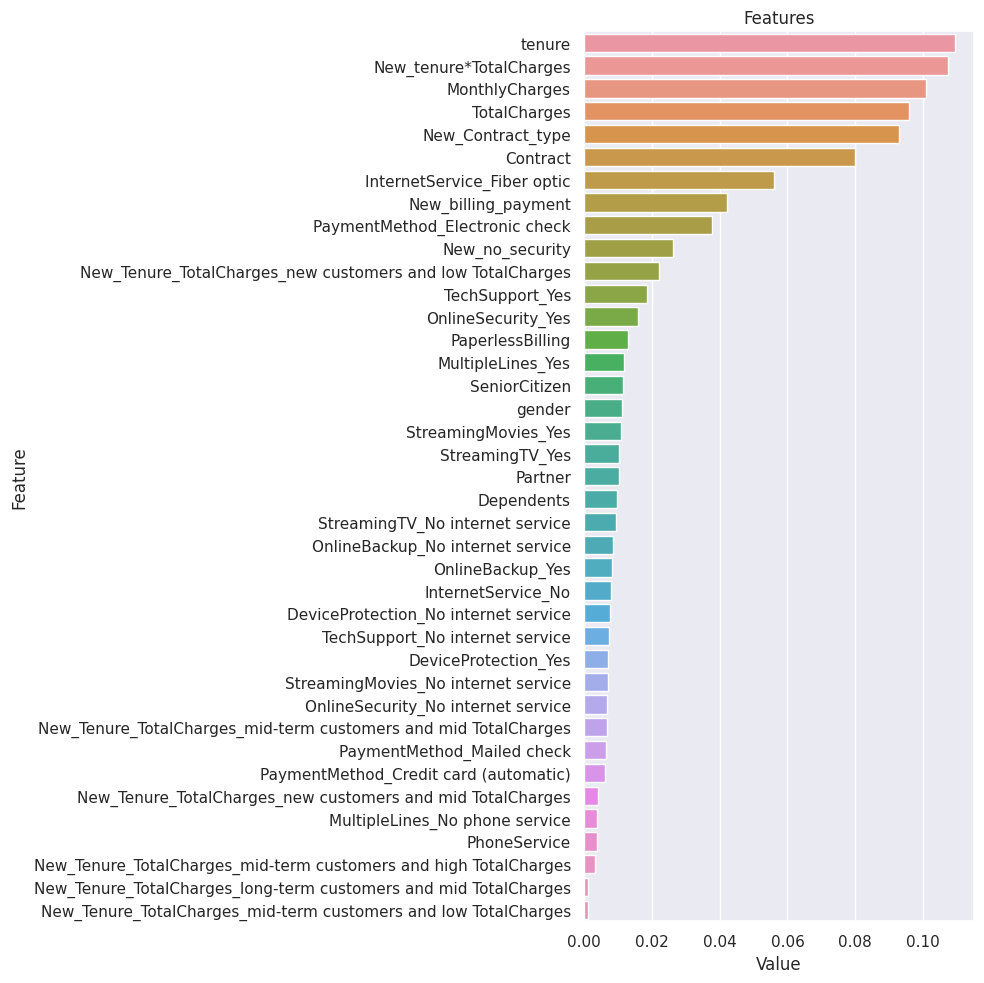

In [104]:
# appyling the function:

plot_importance(model_final, X,start=0, num=40)

## 7.4 Prediction

In [105]:
# selecting a random value:

random = X.sample(1,random_state = 24)

In [106]:
random

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,New_Contract_type,New_billing_payment,New_no_security,New_tenure*TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,New_Tenure_TotalCharges_long-term customers and mid TotalCharges,New_Tenure_TotalCharges_mid-term customers and high TotalCharges,New_Tenure_TotalCharges_mid-term customers and low TotalCharges,New_Tenure_TotalCharges_mid-term customers and mid TotalCharges,New_Tenure_TotalCharges_new customers and low TotalCharges,New_Tenure_TotalCharges_new customers and mid TotalCharges
261,1,1,0,0,-0.789,1,0,1,1.401,-0.405,1,1,1,17735.900,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False


In [107]:
# Make predictions:

prediction = model_final.predict(random)

In [108]:
prediction

array([1])